<a href="https://colab.research.google.com/github/Pchifo/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# prompt: arma un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Artes", "Música", "Informática"
]

# Lista de apellidos y nombres (puedes ampliarla)
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Pérez", "Gómez", "Sánchez", "Díaz"]
nombres = ["Juan", "María", "Pedro", "Ana", "Luis", "Laura", "Carlos", "Sofía", "Diego", "Marta"]

# Crear lista de datos para el DataFrame
data = []
for _ in range(100):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota_1er_trimestre = round(random.uniform(1, 10), 1)
  nota_2do_trimestre = round(random.uniform(1, 10), 1)
  nota_3er_trimestre = round(random.uniform(1, 10), 1)
  faltas = random.randint(0, 15)

  data.append([apellido, nombre, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])


# Crear el DataFrame
df = pd.DataFrame(data, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Fernández,Laura,35615721,Ciencias Naturales,1.6,5.4,6.9,10
1,Fernández,Luis,65264892,Geografía,9.4,4.4,4.1,12
2,González,Juan,74580480,Educación Física,6.2,6.4,5.4,10
3,Díaz,Sofía,69122304,Música,5.2,5.3,5.8,0
4,Rodríguez,Marta,57972493,Música,9.6,9.1,4.9,8
...,...,...,...,...,...,...,...,...
95,López,Laura,90081501,Artes,3.6,3.9,9.3,6
96,Martínez,María,16018001,Historia,6.9,6.0,7.0,2
97,Sánchez,Pedro,83677262,Ciencias Naturales,7.2,9.1,5.0,10
98,López,María,75391471,Informática,4.1,1.9,2.1,13


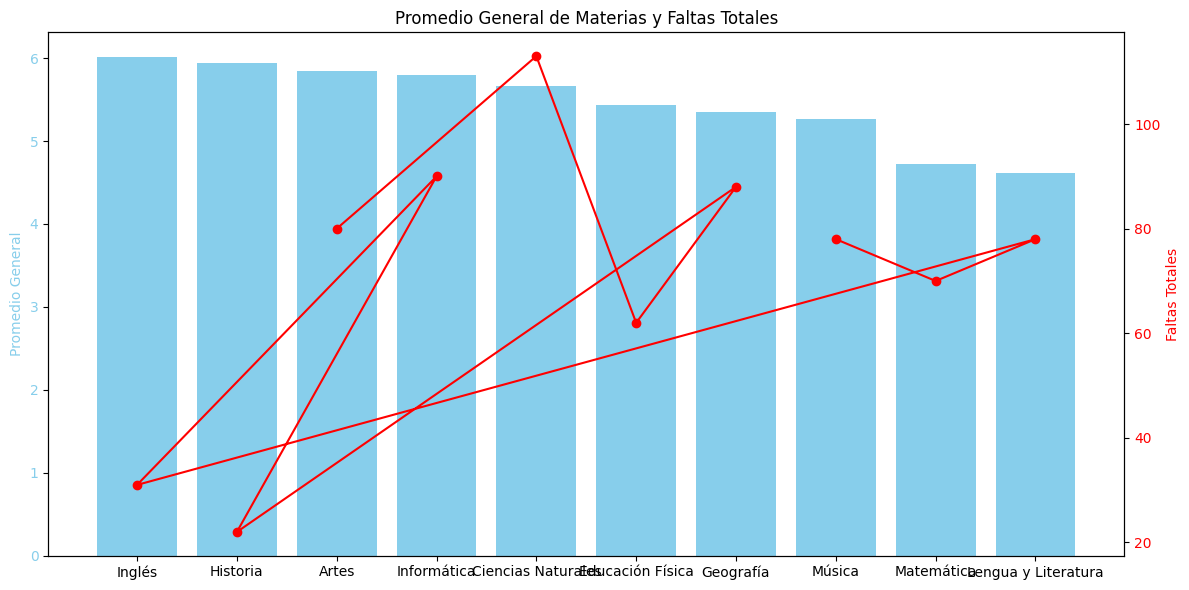

In [6]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias de mayor a menor promedio
promedio_por_materia_ordenado = promedio_por_materia.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar las barras del promedio general de cada materia
ax1.bar(promedio_por_materia_ordenado.index, promedio_por_materia_ordenado.values, color='skyblue')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas Totales')

# Crear un segundo eje y para las faltas
ax2 = ax1.twinx()

# Graficar las faltas como una línea
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el espacio entre las barras y el título
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [7]:
df.to_csv("datos_alumnos.csv", index=False)
